In [30]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

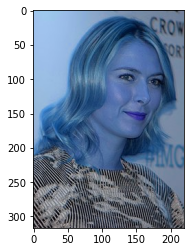

In [31]:
img=cv2.imread('../input/test-images/sharapova.jpg')
img.shape
plt.imshow(img)

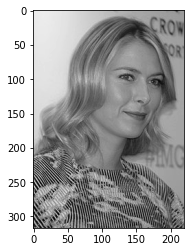

In [32]:
gray=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

plt.imshow(gray,cmap='gray')

In [33]:
gray

array([[204, 205, 205, ..., 135, 134, 134],
       [204, 205, 205, ..., 133, 133, 133],
       [204, 205, 205, ..., 134, 133, 133],
       ...,
       [ 76,  57,  11, ...,  64, 105, 113],
       [ 92, 112,  35, ...,  69, 110, 109],
       [ 37, 128, 115, ...,  92, 112,  90]], dtype=uint8)

In [34]:
img

array([[[158, 197, 236],
        [159, 198, 237],
        [159, 198, 237],
        ...,
        [116, 128, 156],
        [115, 126, 156],
        [113, 127, 156]],

       [[158, 197, 236],
        [159, 198, 237],
        [159, 198, 237],
        ...,
        [114, 126, 154],
        [114, 125, 155],
        [112, 126, 155]],

       [[158, 197, 236],
        [159, 198, 237],
        [159, 198, 237],
        ...,
        [115, 127, 155],
        [114, 125, 155],
        [112, 126, 155]],

       ...,

       [[ 78,  74,  79],
        [ 59,  55,  60],
        [ 13,   9,  14],
        ...,
        [ 66,  62,  67],
        [109, 103, 108],
        [118, 111, 116]],

       [[ 94,  90,  95],
        [114, 110, 115],
        [ 37,  33,  38],
        ...,
        [ 71,  67,  72],
        [114, 108, 113],
        [113, 107, 112]],

       [[ 41,  35,  40],
        [132, 126, 131],
        [119, 113, 118],
        ...,
        [ 94,  90,  95],
        [114, 110, 115],
        [ 92,  88,  93]]

In [35]:
face_cascade= cv2.CascadeClassifier('../input/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('/kaggle/input/haarcascades/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray,1.3,5)
faces

array([[ 99,  58, 116, 116]], dtype=int32)

In [36]:
(x,y,w,h)=faces[0]
x,y,w,h

(99, 58, 116, 116)

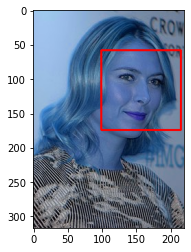

In [37]:
face_plot=cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_plot)

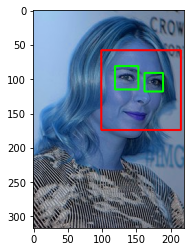

In [38]:
#cv2.destroyAllWindows()
for(x,y,w,h) in faces:
    face_plot = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray= gray[y:y+h, x:x+w]
    roi_color= face_plot[y:y+h, x:x+w]
    eyes=eye_cascade.detectMultiScale(roi_gray)
    for(ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        
plt.figure()
plt.imshow(face_plot,cmap='gray')
plt.show()
    
     

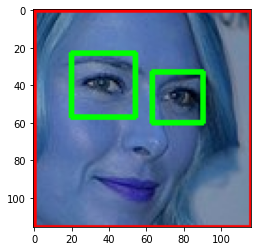

In [39]:
plt.imshow(roi_color,cmap='gray')

In [40]:
def get_roi_if2eyes(img_path):
    img=cv2.imread(img_path)
    gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces=face_cascade.detectMultiScale(img,1.3,5)
    for (x,y,w,h) in faces:
        roi_gray=gray[y:y+h,x:x+w]
        roi_color=img[y:y+h,x:x+w]
        eyes=eye_cascade.detectMultiScale(roi_gray)
        if len(eyes)>=2:
            return roi_color

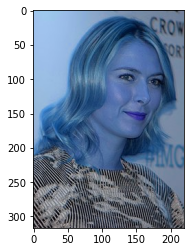

In [41]:
original_img = cv2.imread('../input/test-images/sharapova.jpg')
plt.imshow(original_img)

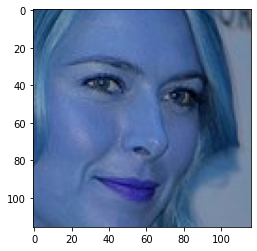

In [42]:
roi_img=get_roi_if2eyes('../input/test-images/sharapova.jpg')
plt.imshow(roi_img)

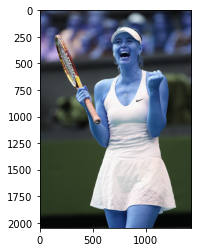

In [43]:
original_img_invalid = cv2.imread('../input/test-images/maria.jpg')
plt.imshow(original_img_invalid)

In [44]:
roi_img_invalid=get_roi_if2eyes('../input/test-images/maria.jpg')
roi_img_invalid

In [55]:
path_to_data='../input/image-dataset/'
path_to_roi_data="/kaggle/working/roi_face/"

In [46]:
import os
img_dirs=[]
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)
        
img_dirs

['../input/image-dataset/roger_federer',
 '../input/image-dataset/serena_williams',
 '../input/image-dataset/lionel_messi',
 '../input/image-dataset/virat_kohli',
 '../input/image-dataset/maria_sharapova']

In [47]:
import shutil
if os.path.exists(path_to_roi_data):
    shutil.rmtree(path_to_roi_data)
os.mkdir(path_to_roi_data)

In [59]:
for img_dir in img_dirs:
    celebrity_name=img_dir.split('/')[-1]
    for entry in os.scandir(img_dir):
        roi_color= get_roi_if2eyes(entry.path)
        if roi_color is not None:
            cropped_folder= path_to_roi_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                print("roi img path is",cropped_folder)
                
            
        

In [ ]:
help(matplotlib.pyplot.figure)
